In [ ]:
'''
Message from the professor on submission instructions

Please input the entire CSV file to your functions. Your function can be 

[Z0, b] = DuckworthLewis20Params(CSV_file_name)

and 

[Z0, L] = DuckworthLewis11Params(CSV_file_name)

Within each function, you may have calls to other functions (all included in the file Assignment2.py) to process, filter, and clean the data.
'''

In [36]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 10)

In [2]:
data = pd.read_csv('cricket.csv')
data.head()

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,Outs.Remaining,Wickets.in.Hand,Run.Rate,Innings.Run.Rate,Run.Rate.Required,Initial.Run.Rate.Required,Target.Score,Day-night,At.Bat,Fielding,Home.Team,Away.Team,Stadium,Country,Total.Overs,Winning.Team,Toss.Winner,at.bat.wins,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,10,10,4.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,10,10,3.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,10,10,5.0,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,10,10,7.4,4.08,-1.0,-1.0,-1,0,Sri Lanka,England,England,Sri Lanka,Lord's,England,50,England,England,0,0,0,1,0,0,1,0,0,0,1


In [3]:
data_first = data[data.Innings == 1].copy()
data_second = data[data.Innings == 2].copy()

In [22]:
def computeZ0(w: int, data_first: pd.core.frame.DataFrame):
    if w == 10:
        return data_first.groupby('Match').first()['Innings.Total.Runs'].mean()
    else:
        return data_first[data_first['Wickets.in.Hand'] <= w].groupby('Match').first()['Runs.Remaining'].mean()

In [78]:
Z = dict()
for w in range(10, -1, -1):
    Z[w] = computeZ0(w, data_first)
    print('Z0({}) = {}'.format(w, computeZ0(w, data_first)))

Z0(10) = 237.4926212227688
Z0(9) = 202.024595924104
Z0(8) = 165.59774964838255
Z0(7) = 129.3248407643312
Z0(6) = 95.128223495702
Z0(5) = 66.10911808669657
Z0(4) = 43.54865085854456
Z0(3) = 27.70970782280867
Z0(2) = 15.194379391100703
Z0(1) = 6.712732919254658
Z0(0) = 0.002976190476190476


In [7]:
# clean data
df1 = data_first[['Match', 'Over', 'Total.Runs', 'Innings.Total.Runs', 'Runs.Remaining', 'Wickets.in.Hand']].copy()
df1['Total.Overs'] = 50
df1['Overs.Remaining'] = df1['Total.Overs'] - df1['Over']
df1 = df1[['Match', 'Overs.Remaining', 'Runs.Remaining', 'Wickets.in.Hand']]
df1

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,65193,49,200,10
1,65193,48,198,10
2,65193,47,195,10
3,65193,46,184,10
4,65193,45,167,10
...,...,...,...,...
126719,536933,4,23,6
126720,536933,3,17,5
126721,536933,2,9,5
126722,536933,1,9,5


In [8]:
# clean data
df2 = data_first[['Match', 'Over', 'Total.Runs', 'Innings.Total.Runs', 'Runs.Remaining', 'Wickets.in.Hand']].copy()
df2['Total.Overs'] = 50
df2 = df2.groupby('Match').first().reset_index()
df2['Wickets.in.Hand'] = 10
df2 = df2[['Match', 'Total.Overs', 'Innings.Total.Runs', 'Wickets.in.Hand']]
df2.columns = ['Match', 'Overs.Remaining', 'Runs.Remaining', 'Wickets.in.Hand']
df2

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,64725,50,363,10
1,64726,50,272,10
2,64727,50,184,10
3,64728,50,206,10
4,64729,50,195,10
...,...,...,...,...
1418,536932,50,418,10
1419,536933,50,267,10
1420,538069,50,91,10
1421,538070,50,262,10


In [9]:
# clean data
df = pd.concat([df2, df1], axis = 0)
df.sort_values(['Match', 'Overs.Remaining'], ascending = [True, False], inplace = True)
df

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
0,64725,50,363,10
6107,64725,49,359,10
6108,64725,48,351,10
6109,64725,47,347,10
6110,64725,46,330,10
...,...,...,...,...
126532,538071,8,15,4
126533,538071,7,12,3
126534,538071,6,7,3
126535,538071,5,3,1


In [132]:
# clean data
X = dict()
u = dict()
y = dict()

X[10] = df[df['Wickets.in.Hand'] == 10].copy()
X[10] = X[10][['Overs.Remaining', 'Runs.Remaining']]
X[10].columns = ['u', 'y']
X[10].to_numpy()
u[10] = X[10].to_numpy()[:, 0]
y[10] = X[10].to_numpy()[:, 1]

In [11]:
u[10]

array([50, 49, 48, ..., 49, 48, 50], dtype=int64)

In [12]:
y[10]

array([363, 359, 351, ..., 256, 251, 177], dtype=int64)

In [133]:
X[w] = df.copy()
X[w] = X[w][['Overs.Remaining', 'Runs.Remaining']]
X[w].columns = ['u', 'y']
X[w].to_numpy()
U = X[w].to_numpy()[:, 0]
Y = X[w].to_numpy()[:, 1]

In [134]:
for w in range(0, 10):
    X[w] = df[df['Wickets.in.Hand'] == w].copy()
    X[w] = X[w][['Overs.Remaining', 'Runs.Remaining']]
    X[w].columns = ['u', 'y']
    X[w].to_numpy()
    u[w] = X[w].to_numpy()[:, 0]
    y[w] = X[w].to_numpy()[:, 1]

In [59]:
def grad_descent(u, y, b0, lr = 0.001):
    assert len(u) == len(y)
    b = b0
    iterations = 0
    while True:
        iterations += 1
        total_loss = 0
        gradient = 0
        
        for i in range(len(u)):
            total_loss += (y[i] - Z[10] * (1 - np.exp(-b * u[i]))) ** 2
            gradient += 2 * (y[i] - Z[10] * (1 - np.exp(-b * u[i]))) * Z[10] * u[i] * np.exp(-b * u[i])
        gradient *= -1
        
        if iterations % 50 == 0:
            print('iterations = ', iterations, ' gradient = ', gradient)
        
        b = b - lr * gradient
        if np.linalg.norm(gradient) < 0.00001:
            print('norm = {}, stopping condition reached'.format(np.linalg.norm(gradient)))
            print('loss = {}', total_loss)
            print('iterations = ', iterations)
            print('optimal b = ', b)
            print()
            break
        pass
    return b

In [58]:
optimal_b = grad_descent(u[10], y[10], 0.066, 0.00000000001)

iterations =  50  gradient =  -988501.5647299542
iterations =  100  gradient =  -36415.90825508861
iterations =  150  gradient =  -1363.373496015156
iterations =  200  gradient =  -51.073886206278985
iterations =  250  gradient =  -1.913342513194948
iterations =  300  gradient =  -0.07167812665284146
iterations =  350  gradient =  -0.0026852807350223884
iterations =  400  gradient =  -0.00010057801409857348
norm = 9.457296982873231e-06, stopping condition reached
loss = {} 32570456.177628186
iterations =  436


In [33]:
optimal_b

0.07104365964848303

In [60]:
optimal_b

0.07104365964848303

In [71]:
b = dict()
for w in range(10, 0, -1):
    print('wickets = ', w)
    b[w] = grad_descent(u[w], y[w], 0.035, 0.000000001)

wickets =  10
iterations =  50  gradient =  11291.184799321289
iterations =  100  gradient =  11340.768541264144
iterations =  150  gradient =  11390.805513578849
iterations =  200  gradient =  11441.302048075691
iterations =  250  gradient =  11492.264595966986
iterations =  300  gradient =  11543.699730709346
iterations =  350  gradient =  11595.614150926254
iterations =  400  gradient =  11648.014683416246
iterations =  450  gradient =  11700.90828624797
iterations =  500  gradient =  11754.302051945677
iterations =  550  gradient =  11808.203210768785


KeyboardInterrupt: 

In [62]:
b

{10: 0.07104365964848303,
 9: 0.04650130672878712,
 8: 0.03924528492681079,
 7: 0.03306056196821701,
 6: 0.029031961297519303,
 5: 0.023515239080184453,
 4: 0.019760236921945402,
 3: 0.013997361926129827,
 2: 0.008311498795056984,
 1: 0.0036932234444472935}

In [65]:
Z

{10: 237.4926212227688,
 9: 202.024595924104,
 8: 165.59774964838255,
 7: 129.3248407643312,
 6: 95.128223495702,
 5: 66.10911808669657,
 4: 43.54865085854456,
 3: 27.70970782280867,
 2: 15.194379391100703,
 1: 6.712732919254658}

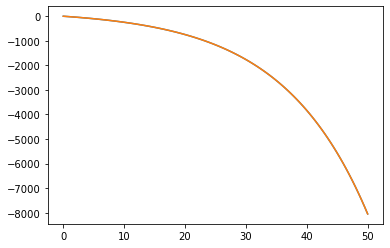

In [47]:
x = np.linspace(0,50,100)
fx = Z[10] * (1 - np.exp(b[10] * x))
plt.plot(x, fx)
plt.plot(x, fx)

In [49]:
pprint(b)

{1: 3.365611695035688,
 2: 1.0406653144141127,
 3: 0.6765007889593138,
 4: 0.4216055691746747,
 5: 0.2669394746228677,
 6: 0.18560083366877955,
 7: 0.1251375776618651,
 8: 0.09708357496946907,
 9: 0.0760795461341224,
 10: 0.0710428170238911}


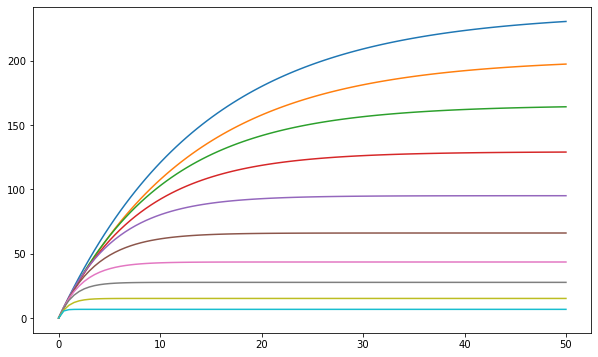

In [52]:
plt.figure(figsize = (10,6))
for w in range(10, 0, -1):
    x = np.linspace(0,50,100)
    fx = Z[w] * (1 - np.exp(-b[w] * x))
    plt.plot(x, fx)

In [42]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(u, b):
    return Z[10] *(1 - np.exp(-b * u))

popt, pcov = curve_fit(func, u[10], y[10])

<ipython-input-42-2720a8103150>:5: RuntimeWarning: overflow encountered in exp
  return Z[10] *(1 - np.exp(-b * u))


In [137]:
b = dict()
for w in range(10, -1, -1):
    def curve(u, b):
        return Z[w] * (1 - np.exp(-b * u))
    params, _ = curve_fit(curve, u[w], y[w])
    b[w] = params[0]
    print('b[{}] = {}'.format(w, params[0]))

b[10] = 0.0710428170238911
b[9] = 0.0760795461341224
b[8] = 0.09708357496946907
b[7] = 0.1251375776618651
b[6] = 0.18560083366877955
b[5] = 0.2669394746228677
b[4] = 0.4216055691746747
b[3] = 0.6765007889593138
b[2] = 1.0406653144141127
b[1] = 3.365611695035688
b[0] = 0.1310611840464143


<ipython-input-137-e0269fa62eb2>:4: RuntimeWarning: overflow encountered in exp
  return Z[w] * (1 - np.exp(-b * u))


In [54]:
for w in range(10, 0, -1):
    print('Z0[{}] = {}'.format(w, Z[w]))

Z0[10] = 237.4926212227688
Z0[9] = 202.024595924104
Z0[8] = 165.59774964838255
Z0[7] = 129.3248407643312
Z0[6] = 95.128223495702
Z0[5] = 66.10911808669657
Z0[4] = 43.54865085854456
Z0[3] = 27.70970782280867
Z0[2] = 15.194379391100703
Z0[1] = 6.712732919254658


In [53]:
for w in range(10, 0, -1):
    print('b[{}] = {}'.format(w, params[0]))

b[10] = 3.365611695035688
b[9] = 3.365611695035688
b[8] = 3.365611695035688
b[7] = 3.365611695035688
b[6] = 3.365611695035688
b[5] = 3.365611695035688
b[4] = 3.365611695035688
b[3] = 3.365611695035688
b[2] = 3.365611695035688
b[1] = 3.365611695035688


In [46]:
pprint(b)

{1: 3.365611695035688,
 2: 1.0406653144141127,
 3: 0.6765007889593138,
 4: 0.4216055691746747,
 5: 0.2669394746228677,
 6: 0.18560083366877955,
 7: 0.1251375776618651,
 8: 0.09708357496946907,
 9: 0.0760795461341224,
 10: 0.0710428170238911}


In [28]:
popt

array([0.07104282])

In [24]:
Z[10]

237.4926212227688

In [14]:
u[10]

array([50, 49, 48, ..., 49, 48, 50], dtype=int64)

In [15]:
y[10]

array([363, 359, 351, ..., 256, 251, 177], dtype=int64)

In [58]:
U.shape

(69217,)

In [59]:
Y.shape

(69217,)

In [81]:
U

array([[50, 10],
       [49, 10],
       [48, 10],
       ...,
       [ 6,  3],
       [ 5,  1],
       [ 4,  1]], dtype=int64)

In [83]:
def curve(U, L):
    u = U[0]
    w = U[1]
    return Z[w] * (1 - np.exp(-L * u / Z[w]))

params, _ = curve_fit(curve, U, Y)
# L = params[0]
# print('Part 2: L = {}'.format(params[0]))

TypeError: unhashable type: 'numpy.ndarray'

In [109]:
Z

{10: 237.4926212227688,
 9: 202.024595924104,
 8: 165.59774964838255,
 7: 129.3248407643312,
 6: 95.128223495702,
 5: 66.10911808669657,
 4: 43.54865085854456,
 3: 27.70970782280867,
 2: 15.194379391100703,
 1: 6.712732919254658,
 0: 0.002976190476190476}

In [ ]:
def fn(L):
    global X2
    t = X2.copy()
    t['f'] = t.apply(lambda row: (row['y'] - Z[row['w']] * (1 - np.exp(-L * row['u'] / Z[row['w']]))) ** 2, axis = 1)
    t['loss'] = t.apply(lambda row: (row['f'] - row['y']) ** 2)
    loss = t['loss'].sum()
    loss = loss / len(t)
    return loss

# backup

In [113]:
def fn(L):
    global X2
    t = X2.copy()
    losses = t.apply(lambda row: (row['y'] - Z[row['w']] * (1 - np.exp(-L * row['u'] / Z[row['w']]))) ** 2, axis = 1)
    loss = losses.sum() / len(t)
    print(loss)
    return loss

from scipy.optimize import minimize
L=0.35
res = minimize(fn, L, method = 'L-BFGS-B')

[20980.82417164]
[20980.82409628]
[14781.00642545]
[14781.00637503]
[7742.59799279]
[7742.59796985]
[4887.42508188]
[4887.42506981]
[3266.64760222]
[3266.64759627]
[2484.98382089]
[2484.98381792]
[2100.57312922]
[2100.57312778]
[1926.06578343]
[1926.06578275]
[1854.00090708]
[1854.00090678]
[1829.34756882]
[1829.3475687]
[1823.31120123]
[1823.31120119]
[1822.5098419]
[1822.50984189]
[1822.47314788]
[1822.47314788]
[1822.47290193]
[1822.47290193]
[1822.47290179]
[1822.47290179]
[1822.47290189]
[1822.47290189]
[1822.4729018]
[1822.4729018]


In [115]:
res

      fun: array([1822.4729018])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00047748])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 34
      nit: 14
     njev: 17
   status: 0
  success: True
        x: array([16.2692299])

In [119]:
opt_L = res.x[0]

In [120]:
opt_L

16.269229895957405

In [122]:
# MSE for Q2
losses = X2.apply(lambda row: (row['y'] - Z[row['w']] * (1 - np.exp(-opt_L * row['u'] / Z[row['w']]))) ** 2, axis = 1)
loss = losses.sum() / len(X2)

In [123]:
loss

1822.4729017975726

In [124]:
b

{10: 0.0710428170238911,
 9: 0.0760795461341224,
 8: 0.09708357496946907,
 7: 0.1251375776618651,
 6: 0.18560083366877955,
 5: 0.2669394746228677,
 4: 0.4216055691746747,
 3: 0.6765007889593138,
 2: 1.0406653144141127,
 1: 3.365611695035688}

In [129]:
X2

,u,w,y
0,50,10,363
6107,49,10,359
6108,48,10,351
6109,47,10,347
6110,46,10,330
...,...,...,...
126532,8,4,15
126533,7,3,12
126534,6,3,7
126535,5,1,3


In [138]:
# MSE for Q1
losses = X2.apply(lambda row: (row['y'] - Z[row['w']] * (1 - np.exp(-b[row['w']] * row['u']))) ** 2, axis = 1)
loss = losses.sum() / len(X2)
print(loss)

1820.4849480802707


In [62]:
X2 = df.copy()
# X[w] = X[w][['Overs.Remaining', 'Runs.Remaining']]
# X[w].columns = ['u', 'y']
# X[w].to_numpy()
# U = X[w].to_numpy()[:, 0]
# Y = X[w].to_numpy()[:, 1]

In [127]:
X2 = df.copy()
X2 = X2[['Overs.Remaining', 'Wickets.in.Hand', 'Runs.Remaining']]
X2.columns = ['u', 'w', 'y']
# X2.to_numpy()
# U = X2.to_numpy()[:, 0:2]
# Y = X2.to_numpy()[:, 2]

In [86]:
X2['f'] = 0 

In [99]:
X2.apply(lambda row: Z[row['w']], axis = 1)

0         237.492621
6107      237.492621
6108      237.492621
6109      237.492621
6110      237.492621
             ...    
126532     43.548651
126533     27.709708
126534     27.709708
126535      6.712733
126536      6.712733
Length: 69217, dtype: float64

In [93]:
X2.u.sum()

1790205

In [94]:
len(X2)

69217

In [128]:
X2

,u,w,y
0,50,10,363
6107,49,10,359
6108,48,10,351
6109,47,10,347
6110,46,10,330
...,...,...,...
126532,8,4,15
126533,7,3,12
126534,6,3,7
126535,5,1,3


In [110]:
X2['f'] = X2.apply(lambda row: (row['y'] - Z[row['w']] * (1 - np.exp(-L * row['u'] / Z[row['w']]))) ** 2, axis = 1)

In [111]:
X2

,u,w,y,f
0,50,10,363,119805.428449
6107,49,10,359,117275.142407
6108,48,10,351,112077.943691
6109,47,10,347,109631.698556
6110,46,10,330,98868.486686
...,...,...,...,...
126532,8,4,15,150.997787
126533,7,3,12,93.222648
126534,6,3,7,24.776525
126535,5,1,3,2.130187


In [100]:
X2

,u,w,y
0,50,10,363
6107,49,10,359
6108,48,10,351
6109,47,10,347
6110,46,10,330
...,...,...,...
126532,8,4,15
126533,7,3,12
126534,6,3,7
126535,5,1,3


In [84]:
X2

,u,w,y
0,50,10,363
6107,49,10,359
6108,48,10,351
6109,47,10,347
6110,46,10,330
...,...,...,...
126532,8,4,15
126533,7,3,12
126534,6,3,7
126535,5,1,3


In [70]:
U

array([[50, 10],
       [49, 10],
       [48, 10],
       ...,
       [ 6,  3],
       [ 5,  1],
       [ 4,  1]], dtype=int64)

In [71]:
Y

array([363, 359, 351, ...,   7,   3,   0], dtype=int64)

In [75]:
Z[1]

6.712732919254658

In [76]:
temp = df[df['Wickets.in.Hand'] == 0].copy()

In [77]:
temp

,Match,Overs.Remaining,Runs.Remaining,Wickets.in.Hand
7141,64732,0,0,0
8365,64733,1,0,0
8557,64735,1,0,0
9920,64737,0,0,0
10371,64740,1,0,0
...,...,...,...,...
125627,530427,9,0,0
125895,530430,0,0,0
124599,531984,1,0,0
124750,531985,28,0,0


In [117]:
res.x

array([16.2692299])